# Part 2 - Data Visualization

## Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sqlite3

## Retrieve Table

In [2]:
def retrieve_table(table_name: str, db: str):
    conn = sqlite3.connect(f"../{db}.db")
    c = conn.cursor()
    data = c.execute(f"""SELECT * FROM {table_name}""").fetchall()
    columns = c.execute(f"""PRAGMA table_info({table_name})""").fetchall()
    columns = [columns[i][1] for i in range(0, len(columns))]
    return pd.DataFrame(data, columns=columns)

In [3]:
sql_tables = {}
for table_name in ['artist','album','track','track_feature']:
    sql_tables[table_name] = retrieve_table(table_name, "spotify")

## Merge tables into songs dataframe

In [4]:
songs = pd.merge(sql_tables['track_feature'], sql_tables['track'], on="track_id", how="outer", suffixes=('_feature','_track'))

songs = pd.merge(songs, sql_tables['album'], on="album_id", how="outer",suffixes=('_track','_album'))

songs = pd.merge(songs, sql_tables['artist'], on="artist_id", how="outer",suffixes=('_album','_artist'))

In [5]:
songs

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type_feature,valence,...,album_uri,artist_id,artist_name,external_url,genre,image_url_artist,followers,popularity,type_artist,artist_uri
0,6lzc0Al0zfZOIFsFvBS1ki,0.594,0.713,0.000000,0.1140,-5.314,0.0503,129.958,audio_features,0.328,...,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/artist/06HL4z0CvFAxyc...,pop,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...,58840286,94,artist,spotify:artist:06HL4z0CvFAxyc27GXpf02
1,4OAuvHryIVv4kMDNSLuPt6,0.516,0.777,0.000002,0.0761,-4.908,0.0375,125.047,audio_features,0.408,...,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/artist/06HL4z0CvFAxyc...,pop,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...,58840286,94,artist,spotify:artist:06HL4z0CvFAxyc27GXpf02
2,3S7HNKPakdwNEBFIVTL6dZ,0.645,0.593,0.000127,0.1300,-6.506,0.0288,109.984,audio_features,0.299,...,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/artist/06HL4z0CvFAxyc...,pop,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...,58840286,94,artist,spotify:artist:06HL4z0CvFAxyc27GXpf02
3,6AtZLIzUINvExIUy4QhdjP,0.584,0.557,0.000000,0.0576,-6.371,0.0342,154.008,audio_features,0.767,...,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/artist/06HL4z0CvFAxyc...,pop,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...,58840286,94,artist,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,3nsfB1vus2qaloUdcBZvDu,0.440,0.528,0.002030,0.2340,-7.809,0.0317,185.972,audio_features,0.132,...,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/artist/06HL4z0CvFAxyc...,pop,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...,58840286,94,artist,spotify:artist:06HL4z0CvFAxyc27GXpf02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,5ro7xAxDVbtabTl8t3MzHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,spotify:album:51B7LbLWgYLKBVSpkan8Z7,0ECwFtbIWEVNwjlrfc6xoL,Eagles,https://open.spotify.com/artist/0ECwFtbIWEVNwj...,album rock,https://i.scdn.co/image/ab6761610000e5eb0767e1...,8604092,75,artist,spotify:artist:0ECwFtbIWEVNwjlrfc6xoL
4330,0J8Q2BOEzphO2tTUlfCUln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,spotify:album:51B7LbLWgYLKBVSpkan8Z7,0ECwFtbIWEVNwjlrfc6xoL,Eagles,https://open.spotify.com/artist/0ECwFtbIWEVNwj...,album rock,https://i.scdn.co/image/ab6761610000e5eb0767e1...,8604092,75,artist,spotify:artist:0ECwFtbIWEVNwjlrfc6xoL
4331,0cuiu7deGyY5kSKZgMEyaJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,spotify:album:51B7LbLWgYLKBVSpkan8Z7,0ECwFtbIWEVNwjlrfc6xoL,Eagles,https://open.spotify.com/artist/0ECwFtbIWEVNwj...,album rock,https://i.scdn.co/image/ab6761610000e5eb0767e1...,8604092,75,artist,spotify:artist:0ECwFtbIWEVNwjlrfc6xoL
4332,40h65HAR8COEoqkMwUUQHu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,spotify:album:51B7LbLWgYLKBVSpkan8Z7,0ECwFtbIWEVNwjlrfc6xoL,Eagles,https://open.spotify.com/artist/0ECwFtbIWEVNwj...,album rock,https://i.scdn.co/image/ab6761610000e5eb0767e1...,8604092,75,artist,spotify:artist:0ECwFtbIWEVNwjlrfc6xoL


In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4334 entries, 0 to 4333
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            4334 non-null   object 
 1   danceability        3500 non-null   float64
 2   energy              3500 non-null   float64
 3   instrumentalness    3500 non-null   float64
 4   liveness            3500 non-null   float64
 5   loudness            3500 non-null   float64
 6   speechiness         3500 non-null   float64
 7   tempo               3500 non-null   float64
 8   type_feature        3500 non-null   object 
 9   valence             3500 non-null   float64
 10  song_uri_feature    3500 non-null   object 
 11  song_name           4334 non-null   object 
 12  external_url_track  4334 non-null   object 
 13  duration_ms         4334 non-null   int64  
 14  explicit            4334 non-null   int64  
 15  disc_number         4334 non-null   int64  
 16  type_t

In [7]:
songs.groupby("artist_name").nunique().iloc[:, 0:10]

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type_feature,valence
artist_name,,,,,,,,,,
Adele,46,45,46,20,40,46,45,46,1,46
Bad Bunny,92,84,80,60,78,92,87,92,1,83
Beyoncé,375,206,206,178,207,248,219,251,1,220
Billie Eilish,46,45,41,43,39,44,44,46,1,46
Britney Spears,196,0,0,0,0,0,0,0,0,0
Camilo,32,32,32,5,32,32,31,32,1,32
Coldplay,209,154,169,178,155,184,139,185,1,166
Eagles,161,0,0,0,0,0,0,0,0,0
Ed Sheeran,232,117,131,45,119,145,132,150,1,135


## Data Visualizations

### Common Functions

In [71]:
def retrieve_query_pd(query: str, columns: list):
    conn = sqlite3.connect(f"../spotify.db")
    c = conn.cursor()
    data = c.execute(query)
    data = data.fetchall()
    return pd.DataFrame(data, columns=columns)

In [72]:
def plot_spotify_bar(df: str, y: list, width: list, title: str, xlabel: str, filename_to_save: str):
    
    fig, ax = plt.subplots(figsize = (10,9))
        
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    color=plt.get_cmap("viridis")(rescale(width))
    
    plt.barh(y = y, width = width, color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.grid(axis = 'x')
    plt.savefig(f'../views/{filename_to_save}.png', bbox_inches='tight')

### Top songs by artist in terms of duration_ms

In [73]:
top_songs_by_artist_by_duration = retrieve_query_pd(
                  """SELECT artist.artist_name,
                                track.song_name,
                                MAX(track.duration_ms) AS duration_ms
                        FROM artist JOIN album ON artist.artist_id = album.artist_id
                            JOIN track ON album.album_id = track.album_id
                        GROUP BY 1
                        ORDER BY 3
                    """,
                  ['artist_name','song_name','duration_ms'])

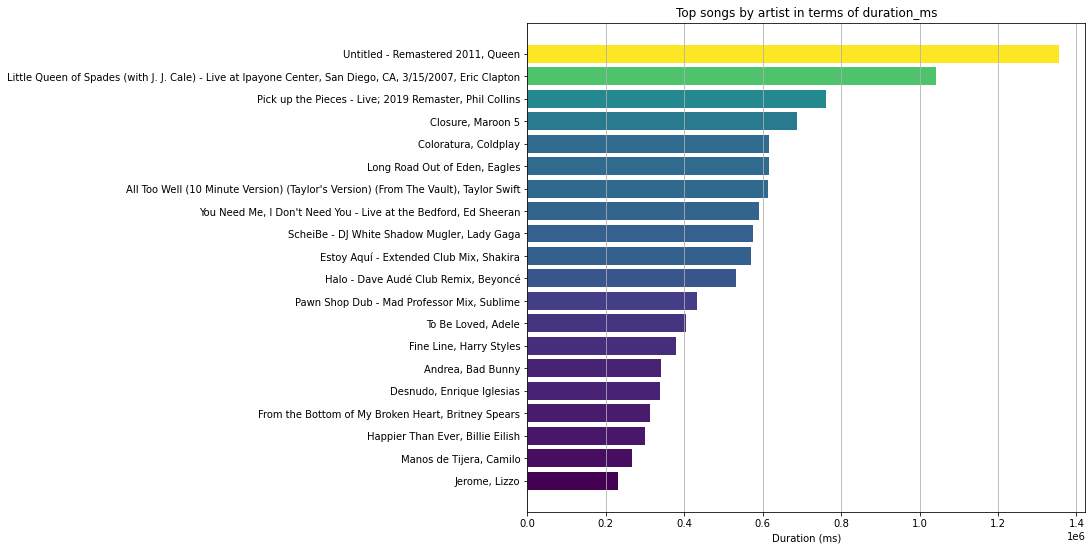

In [74]:
plot_spotify_bar(top_songs_by_artist_by_duration,
                 [', '.join(x) for x in zip(top_songs_by_artist_by_duration['song_name'],top_songs_by_artist_by_duration['artist_name'])],
                 top_songs_by_artist_by_duration['duration_ms'],
                 'Top songs by artist in terms of duration_ms',
                 'Duration (ms)',
                 'top_songs_by_artist_by_duration')
                 

### Top artists in the database by # of followers

In [75]:
def retrieve_artists_followers(db: str):
    conn = sqlite3.connect(f"../{db}.db")
    c = conn.cursor()
    data = c.execute("""SELECT artist_name,
                                followers
                        FROM artist
                        ORDER BY 2
                    """)
    data = data.fetchall()
    columns = ['artist_name','followers']
    return pd.DataFrame(data, columns=columns)

In [76]:
artists_by_followers = retrieve_query_pd("""SELECT artist_name, followers
                                                FROM artist
                                                ORDER BY 2""",
                                         ['artist_name','followers']
)

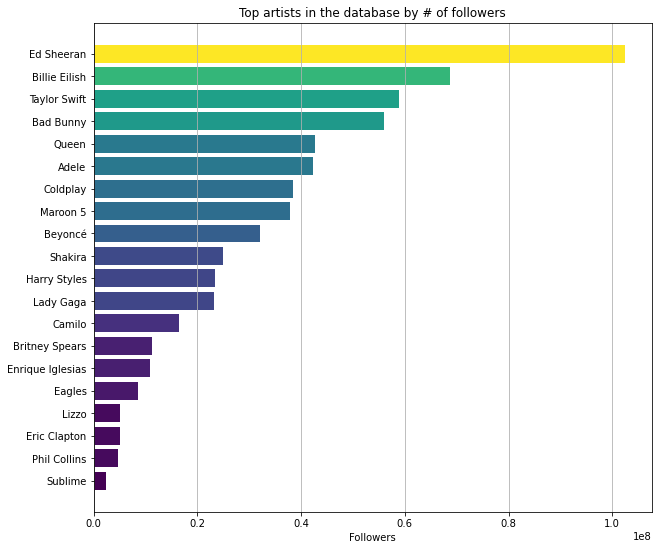

In [78]:
plot_spotify_bar(artists_by_followers, artists_by_followers['artist_name'], artists_by_followers['followers'],
                 'Top artists in the database by # of followers', 'Followers','top_artists_by_followers')

### Top songs by artist in terms of tempo

In [81]:
songs.columns

Index(['track_id', 'danceability', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'type_feature', 'valence',
       'song_uri_feature', 'song_name', 'external_url_track', 'duration_ms',
       'explicit', 'disc_number', 'type_track', 'song_uri_track', 'album_id',
       'album_name', 'external_url_album', 'image_url_album', 'release_date',
       'total_tracks', 'type_album', 'album_uri', 'artist_id', 'artist_name',
       'external_url', 'genre', 'image_url_artist', 'followers', 'popularity',
       'type_artist', 'artist_uri'],
      dtype='object')

In [83]:
top_songs_by_artist_by_tempo = retrieve_query_pd(
                  """SELECT artist.artist_name,
                                track.song_name,
                                MAX(track_feature.tempo) AS tempo
                        FROM artist JOIN album ON artist.artist_id = album.artist_id
                            JOIN track ON album.album_id = track.album_id
                            JOIN track_feature ON track.track_id = track_feature.track_id
                        GROUP BY 1
                        ORDER BY 3
                    """,
                  ['artist_name','song_name','tempo'])

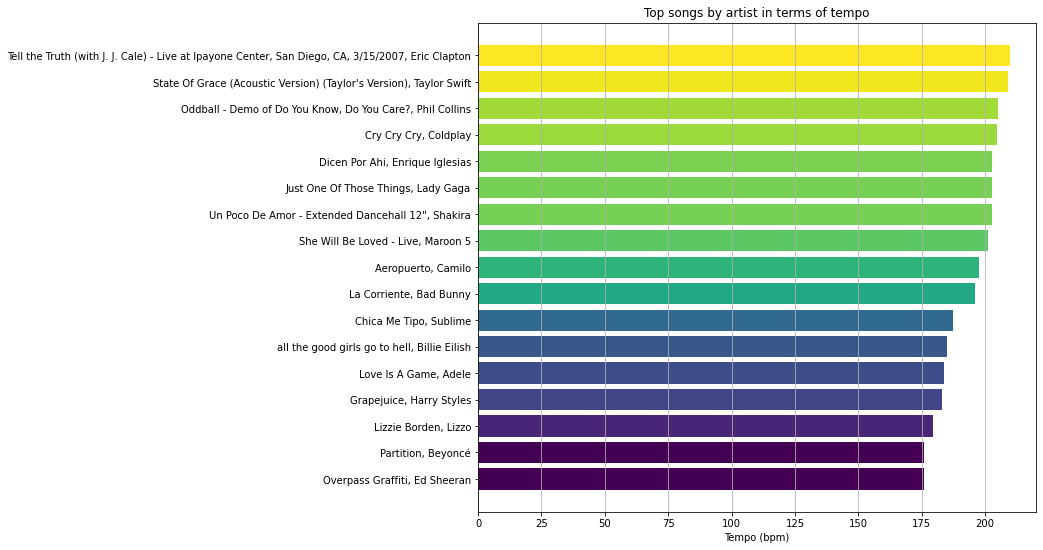

In [88]:
plot_spotify_bar(top_songs_by_artist_by_tempo,
                 [', '.join(x) for x in zip(top_songs_by_artist_by_tempo['song_name'],top_songs_by_artist_by_tempo['artist_name'])],
                 top_songs_by_artist_by_tempo['tempo'],
                 'Top songs by artist in terms of tempo',
                 'Tempo (bpm)',
                 'top_songs_by_artist_by_tempo')
                 